In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [5]:
# load the data
data = pd.read_csv("olympic_data.csv", encoding = 'latin1')
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [6]:
# know the structure of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [7]:
data.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [8]:
data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

### Data Cleaning

In [9]:
# remove duplicates
data = data.drop_duplicates()

In [10]:
# drop the rows with missing essential values
essential_cols = ['Year', 'City', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']
data = data.dropna(subset=essential_cols)


In [14]:
# convert the data types
data['Year'] = data['Year'].astype(int)

categorical_cols = ['Gender', 'Event_gender', 'Medal', 'Country_Code']
for col in categorical_cols:
    data[col] = data[col].astype('category')


In [15]:
# standardize text columns
text_columns = ['City', 'Sport', 'Discipline', 'Event', 'Athlete', 'Country']
for col in text_columns:
    data[col] = data[col].str.strip().str.title()

In [16]:
# standardise the country codes to uppercase
data['Country_Code'] = data['Country_Code'].str.upper()

In [17]:
# validate the categories
print('Gender:', data['Gender'].unique())
print('Event_gender:', data['Event_gender'].unique())
print('Medal:', data['Medal'].unique())

Gender: ['Women', 'Men']
Categories (2, object): ['Men', 'Women']
Event_gender: ['W', 'M', 'X']
Categories (3, object): ['M', 'W', 'X']
Medal: ['Silver', 'Bronze', 'Gold']
Categories (3, object): ['Bronze', 'Gold', 'Silver']


In [18]:
# check inconsistent country names or codes
print(data['Country'].value_counts())

Country
United States    1992
Soviet Union     1021
Australia         798
Germany           691
China             679
                 ... 
Panama              1
Mauritius           1
Sudan               1
Togo                1
Afghanistan         1
Name: count, Length: 127, dtype: int64


### Feature Engineering

In [19]:
# Medal value
medal_map = {'Gold': 3, 'Silver': 2, 'Bronze': 1}
data['Medal_Value'] = data['Medal'].map(medal_map)

In [20]:
# split the athlete names
data[['Last_Name', 'First_Name']] = data['Athlete'].str.split(',', n=1, expand=True)
data['First_Name'] = data['First_Name'].str.strip()
data['Last_Name'] = data['Last_Name'].str.strip()

In [21]:
# Add decade column
data['Decade'] = (data['Year'] // 10) * 10

In [22]:
# check if changes made are properly done
data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal', 'Medal_Value',
       'Last_Name', 'First_Name', 'Decade'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   City          15315 non-null  object  
 1   Year          15315 non-null  int64   
 2   Sport         15315 non-null  object  
 3   Discipline    15315 non-null  object  
 4   Event         15315 non-null  object  
 5   Athlete       15315 non-null  object  
 6   Gender        15315 non-null  category
 7   Country_Code  15315 non-null  object  
 8   Country       15315 non-null  object  
 9   Event_gender  15315 non-null  category
 10  Medal         15315 non-null  category
 11  Medal_Value   15315 non-null  category
 12  Last_Name     15315 non-null  object  
 13  First_Name    15222 non-null  object  
 14  Decade        15315 non-null  int64   
dtypes: category(4), int64(2), object(9)
memory usage: 1.5+ MB


### Data Analysis Phase

##### Total medal by each country

In [28]:
medal_count = data['Country'].value_counts().reset_index()
medal_count.columns = ['Country', 'Total_Medals']
medal_count.index = medal_count.index + 1

print(medal_count.head(10))

           Country  Total_Medals
1    United States          1992
2     Soviet Union          1021
3        Australia           798
4          Germany           691
5            China           679
6           Russia           638
7     East Germany           626
8            Italy           486
9          Romania           482
10  United Kingdom           467


##### Medal Distribution by country

In [33]:
medal_dist = data.groupby(['Country', 'Medal']).size().unstack(fill_value=0)
medal_dist['Total'] = medal_dist.sum(axis=1)
medal_dist = medal_dist.sort_values(by='Total', ascending=False)

print(medal_dist.head(10))

Medal           Bronze  Gold  Silver  Total
Country                                    
United States      481   928     583   1992
Soviet Union       297   439     285   1021
Australia          312   216     270    798
Germany            278   237     176    691
China              193   234     252    679
Russia             240   192     206    638
East Germany       150   286     190    626
Italy              178   145     163    486
Romania            190   135     157    482
United Kingdom     188   122     157    467


##### Top 10 athletes with most medals

In [35]:
athlete_medals = data['Athlete'].value_counts().reset_index()
athlete_medals.columns = ['Athlete', 'Medal_Count']
athlete_medals.index = athlete_medals.index + 1
print(athlete_medals.head(10))

                Athlete  Medal_Count
1       Phelps, Michael           16
2    Andrianov, Nikolay           12
3          Torres, Dara           12
4         Nemov, Alexei           12
5       Fischer, Birgit           12
6       Thompson, Jenny           12
7     Coughlin, Natalie           11
8       Biondi, Matthew           11
9   Dityatin, Aleksandr           10
10          Lewis, Carl           10


##### Most succesful sports by Medals

In [37]:
sport_medals = data['Sport'].value_counts().reset_index()
sport_medals.columns = ['Sport', 'Total_Medals']
sport_medals.index = sport_medals.index + 1
print(sport_medals)

                Sport  Total_Medals
1            Aquatics          2210
2           Athletics          1523
3              Rowing          1377
4              Hockey           816
5          Gymnastics           783
6            Handball           780
7          Volleyball           695
8       Canoe / Kayak           672
9            Football           669
10         Basketball           646
11            Fencing           606
12          Wrestling           533
13            Cycling           483
14         Equestrian           423
15            Sailing           417
16             Boxing           416
17               Judo           396
18           Shooting           345
19           Baseball           335
20      Weightlifting           311
21           Softball           180
22            Archery           162
23          Badminton           120
24       Table Tennis           120
25             Tennis           118
26  Modern Pentathlon            81
27          Taekwondo       

##### Year wise medal trend(all countries combined)

In [39]:
yearly_medals = data['Year'].value_counts().sort_index().reset_index()
yearly_medals.columns = ['Year', 'Total_Medals']
yearly_medals.index = yearly_medals.index + 1
print(yearly_medals)

   Year  Total_Medals
1  1976          1305
2  1980          1386
3  1984          1459
4  1988          1546
5  1992          1705
6  1996          1859
7  2000          2015
8  2004          1998
9  2008          2042


##### Gender wise participation and medals over time

In [41]:
gender_year = data.groupby(['Year', 'Gender']).size().unstack(fill_value=0).reset_index()
gender_year.index = gender_year.index + 1
print(gender_year)

Gender  Year   Men  Women
1       1976   924    381
2       1980   957    429
3       1984   973    486
4       1988  1011    535
5       1992  1105    600
6       1996  1082    777
7       2000  1126    889
8       2004  1099    899
9       2008  1110    932


##### Top Countries by year

In [45]:
top_countries_by_year = data.groupby(['Year', 'Country']).size().reset_index(name='Medal_Count')
top_countries = top_countries_by_year.sort_values(['Year', 'Medal_Count'], ascending=[True, False])

# Get top 5 countries each year
top_5_countries_each_year = top_countries.groupby('Year').head(5).reset_index(drop=True)

print(top_5_countries_each_year.to_string(index = False))

 Year       Country  Medal_Count
 1976  Soviet Union          285
 1976  East Germany          192
 1976 United States          155
 1976  West Germany           75
 1976        Poland           73
 1980  Soviet Union          442
 1980  East Germany          260
 1980      Bulgaria           94
 1980       Romania           72
 1980       Hungary           61
 1984 United States          333
 1984  West Germany          157
 1984       Romania          106
 1984    Yugoslavia           87
 1984        Canada           86
 1988  Soviet Union          294
 1988 United States          193
 1988  East Germany          174
 1988  West Germany          113
 1988  Korea, South           77
 1992 United States          224
 1992  Unified Team          223
 1992       Germany          198
 1992         China           83
 1992          Cuba           71
 1996 United States          260
 1996     Australia          132
 1996       Germany          124
 1996        Russia          115
 1996     

### Now visualize the insights

##### Top 10 countries by total medals

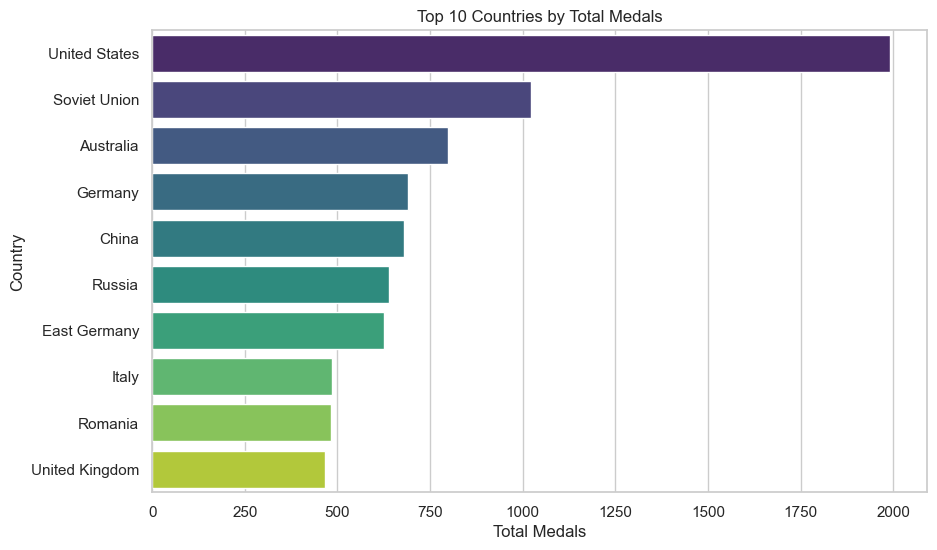

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=medal_count.head(10), x='Total_Medals', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.show()

##### Medal distribution by each country

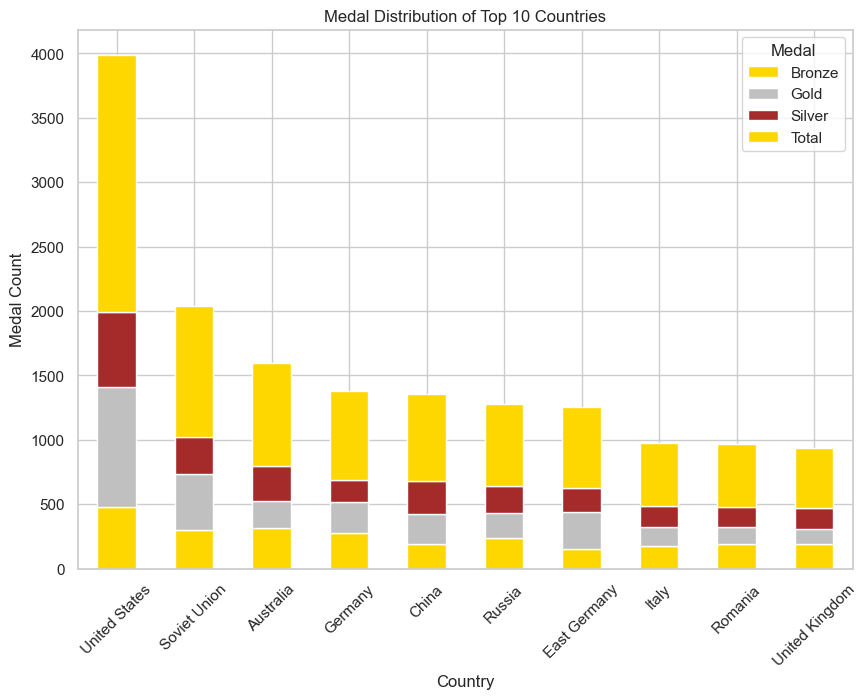

In [48]:
medal_dist.head(10).plot(kind='bar', stacked=True, figsize=(10,7), color=['gold', 'silver', 'brown'])
plt.title('Medal Distribution of Top 10 Countries')
plt.ylabel('Medal Count')
plt.xlabel('Country')
plt.legend(title='Medal')
plt.xticks(rotation=45)
plt.show()

##### Year wise medal trend(Total medals)

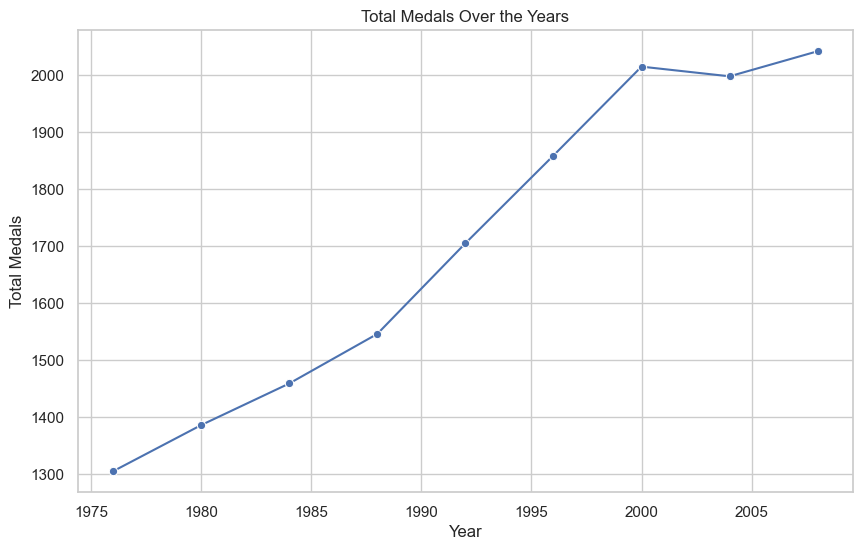

In [49]:
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_medals, x='Year', y='Total_Medals', marker='o')
plt.title('Total Medals Over the Years')
plt.ylabel('Total Medals')
plt.xlabel('Year')
plt.grid(True)
plt.show()

##### Gender wise participation over the years

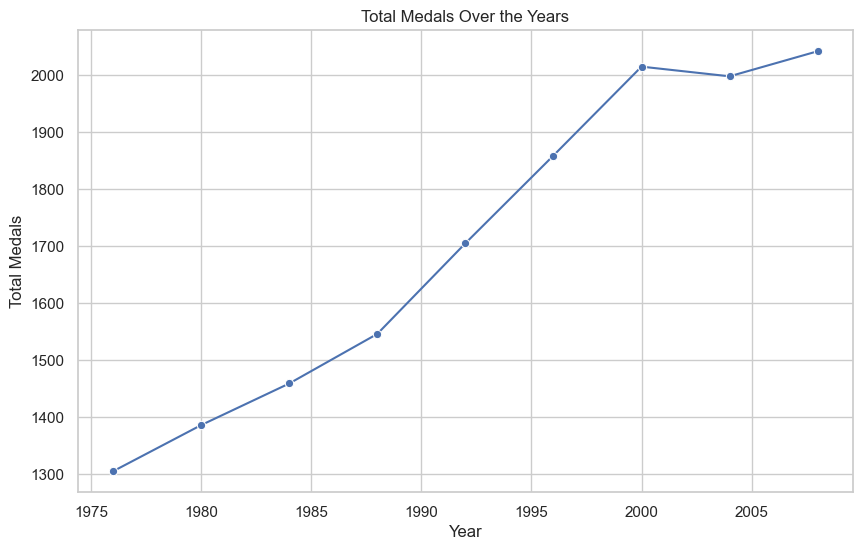

In [51]:
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_medals, x='Year', y='Total_Medals', marker='o')
plt.title('Total Medals Over the Years')
plt.ylabel('Total Medals')
plt.xlabel('Year')
plt.grid(True)
plt.show()

##### Gender wise participation over the years

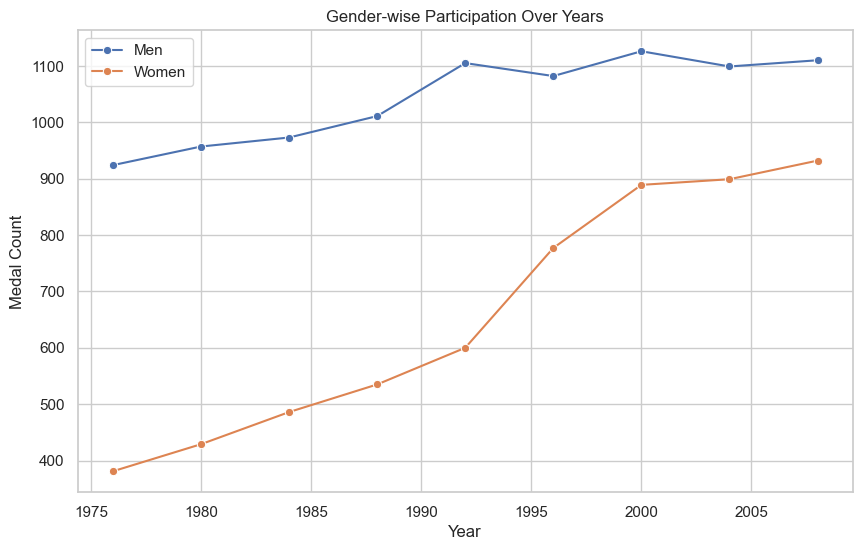

In [52]:
plt.figure(figsize=(10,6))
sns.lineplot(data=gender_year, x='Year', y='Men', label='Men', marker='o')
sns.lineplot(data=gender_year, x='Year', y='Women', label='Women', marker='o')
plt.title('Gender-wise Participation Over Years')
plt.ylabel('Medal Count')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.show()

##### Top 5 countries per year

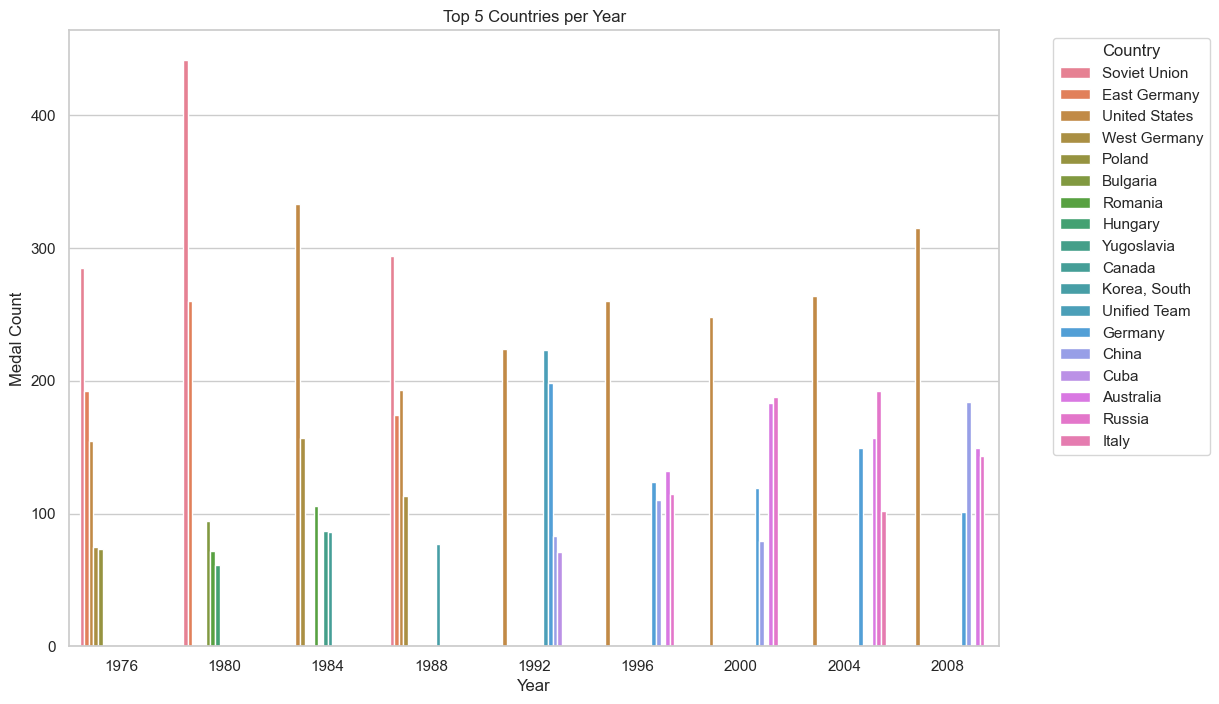

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_5_countries_each_year, x='Year', y='Medal_Count', hue='Country')
plt.title('Top 5 Countries per Year')
plt.ylabel('Medal Count')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1))
plt.show()

##### Most popular sports by medal count

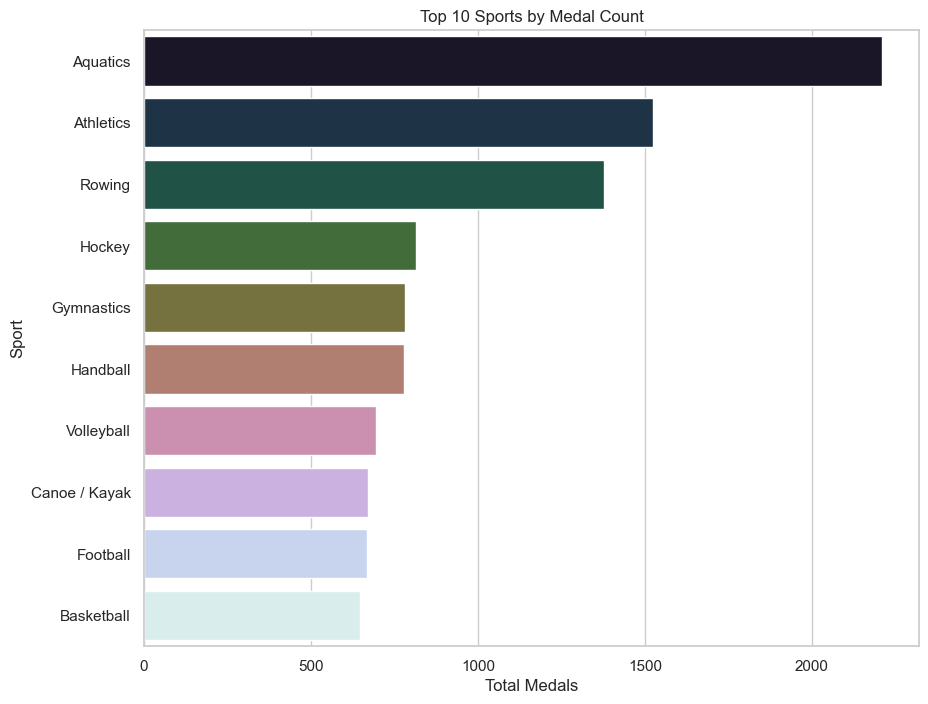

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(data=sport_medals.head(10), x='Total_Medals', y='Sport', palette='cubehelix')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Total Medals')
plt.ylabel('Sport')
plt.show()

##### Heatmap of top countries by year

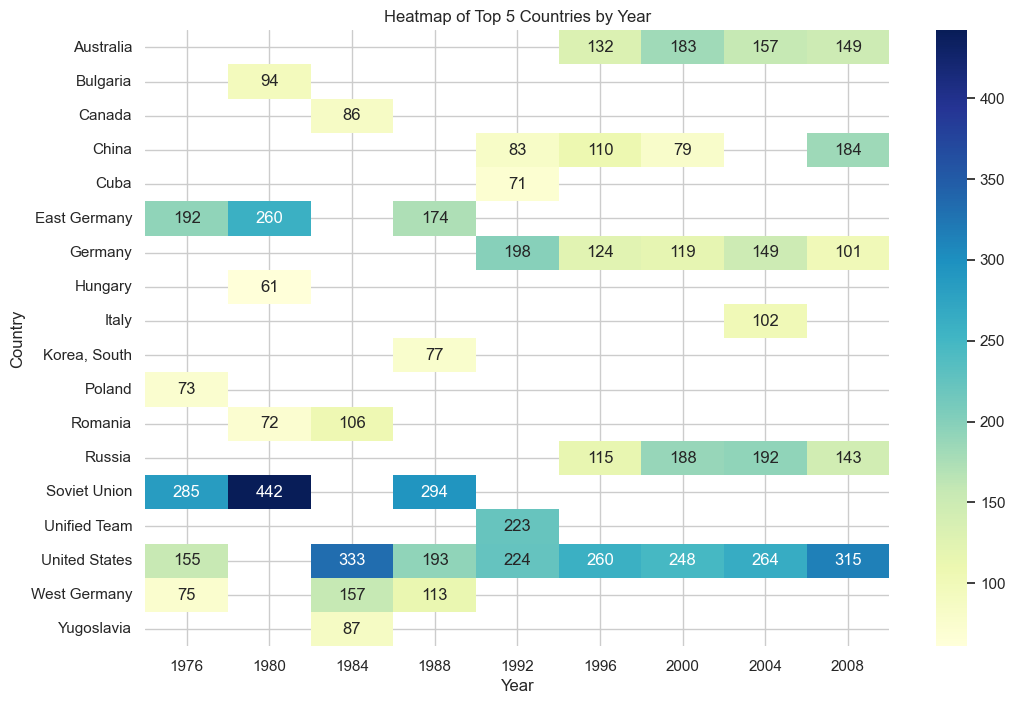

In [57]:
pivot_table = top_5_countries_each_year.pivot(index='Country', columns='Year', values='Medal_Count')

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap of Top 5 Countries by Year')
plt.show()